In [2]:
import os
import pickle
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from yellowbrick.model_selection import ValidationCurve
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV



def load_data(file):
    """
    Função para carregamento de arquivo 
    
    """
    path = input('Por favor adicione o diretório de trabalho?')
    for dirname, _, filename in os.walk(path, topdown = True):
        for filename in filename:
            if filename == file:
                data = pd.read_csv(os.path.join(dirname,filename), header = None)
            else:
                pass
    print("Carregamento finalizado!!!")
    return data

X_treino = load_data('X_treino.csv')
y_treino = load_data('y_treino.csv')

Por favor adicione o diretório de trabalho? C:\1.Portfolio\Machine_Learning_DSA_Projects\Projeto_1_Santander_Customers\data\02_processed


Carregamento finalizado!!!


Por favor adicione o diretório de trabalho? C:\1.Portfolio\Machine_Learning_DSA_Projects\Projeto_1_Santander_Customers\data\02_processed


Carregamento finalizado!!!


In [3]:
def random_RF(X_treino,y_treino,n_iter, model_name):
    
    print('> Procurando os melhores parametros...')
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 500, num = 7)]
    max_depth = [5,15,25]
    criterion = ['gini','entropy']
    min_samples_split = [2, 5, 10]
    min_samples_leaf = [1, 2, 4, 6]
   
    

    random_grid = {'n_estimators': n_estimators,
                   'criterion': criterion,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf}
    

    random_state = 2
    rfc = RandomForestClassifier(n_jobs=-1)
    rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, 
                                   n_iter = n_iter, cv = 3, verbose=1, random_state=random_state, 
                                   n_jobs = -1, scoring = {'roc_auc':'roc_auc'}, 
                                   refit='roc_auc')

    # Fit the random search model
    print('> Fitting Modelo...')
    model = rf_random.fit(X_treino, y_treino)
    filename = model_name
    pickle.dump(model, open(filename, 'wb'))
    
    print('> Treinamento realizado...')
    return model.best_estimator_, model.cv_results_, model.best_params_

In [4]:
trained_model, results, params=random_RF(X_treino,y_treino,5, model_name='model_1401.sav')

> Procurando os melhores parametros...
> Fitting Modelo...
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 11.2min finished


> Treinamento realizado...


In [5]:
params

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 25,
 'criterion': 'gini'}

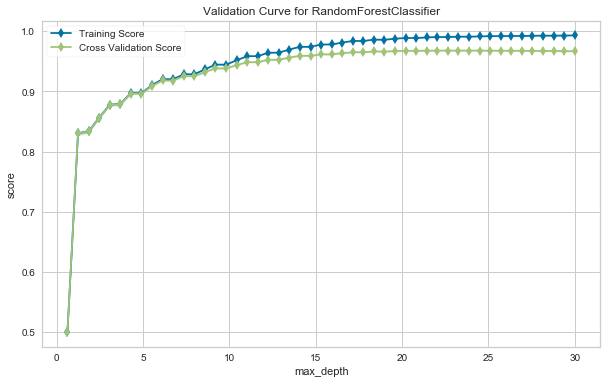

In [6]:
# Function

def validation_curve(model, X, y, param, rang, cv):
    
    f, ax  = plt.subplots(figsize=(10,6))
    viz = ValidationCurve(
    model, param_name=param,
    param_range=rang, cv=cv, scoring="roc_auc", n_jobs=-1
    )


    viz.fit(X, y)
    viz.show()
    plt.show()
    

validation_curve(trained_model, X_treino, y_treino, param='max_depth', rang=np.linspace(0,30), cv=5)

In [8]:
#Treinando modelo com os parametros encontrados

def fitting_model_rf(X, y, model_name, n_estimators=200 , max_depth=20 ,
                     criterion='gini' , min_samples_split=2 ,
                     min_samples_leaf =1):
    
    
    rf = RandomForestClassifier(n_estimators=n_estimators , max_depth=max_depth ,
                     criterion=criterion , min_samples_split=min_samples_split ,
                     min_samples_leaf=min_samples_leaf)
    
    
    # Fit do modelo
    print('> Treinando Modelo...')
    model = rf.fit(X, y)
    filename = model_name
    pickle.dump(model, open(filename, 'wb'))
    print('>Modelo treinado...')
    return model

fitting_model_rf(X_treino,y_treino,'model_1801.sav')

> Treinando Modelo...


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)